In [2]:
import numpy as np
from sklearn.cluster import KMeans, OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
starlink_data = np.load("starlink_data.npy")
starlink_data = np.nan_to_num(starlink_data, nan = 0)
print(starlink_data.shape)

(1984, 8018, 10)


In [4]:
def kmeans_elbow(data: np.ndarray, num_cluster: int):
    '''
    Calculates the sum of squares for different number of clusters using K-means
    This allows to select an optimal number of cluster
    '''
    sum_squares = np.zeros(len(range(2, num_cluster+1, 2)))
    j=0
    for i in range(2, num_cluster+1, 2):
        kmeans = KMeans(n_clusters=i, random_state=0).fit(data)
        print("Num cluster:", i, "Sum of squares:", kmeans.inertia_)
        sum_squares[j] = kmeans.inertia_
        j+=1
    
    plt.figure(figsize=(12, 7.5))
    plt.plot(np.arange(2, num_cluster+1, 2), sum_squares)
    plt.ylabel('Sum of Squares', fontsize = 14)
    plt.xlabel('Number of clusters', fontsize = 14)
    plt.show()

def plot_time_clusters(cluster: np.ndarray, num_cluster: int, 
            angular_momentum_x: np.ndarray,
            angular_momentum_y: np.ndarray,
            angular_momentum_z: np.ndarray, time: np.ndarray):
    fig = plt.figure(figsize= (15,15))
    fig, axs =plt.subplots(3,1, sharex= True)
    axs[0].scatter(time[cluster == num_cluster],angular_momentum_x[cluster == num_cluster])
    axs[0].set_ylabel('h_x')
    axs[1].scatter(time[cluster == num_cluster],angular_momentum_y[cluster == num_cluster])
    axs[1].set_ylabel('h_y')
    axs[2].scatter(time[cluster == num_cluster],angular_momentum_z[cluster == num_cluster])
    axs[2].set_ylabel('h_z')
    axs[2].set_xlabel('Time in Days')

In [8]:
time = starlink_data[:, 127:666, 0]

time = (time - 2022*10**9) *10**-6
time = time - time[:,0:1]
time[time<0] = 0


angular_momentum_x = starlink_data[:, 127:666, 7]
angular_momentum_y = starlink_data[:, 127:666, 8]
angular_momentum_z = starlink_data[:, 127:666, 9]

normed_angular_momentum_x = StandardScaler().fit_transform(angular_momentum_x)
normed_angular_momentum_y = StandardScaler().fit_transform(angular_momentum_y)
normed_angular_momentum_z = StandardScaler().fit_transform(angular_momentum_z)

print(time.shape)
print(normed_angular_momentum_x.shape)


2022032144421.753
0.0
(1984, 539)
(1984, 539)


7719246.711281534
3364745.085440152
1969392.9931124805
1454315.4264143587
1060430.242683729
882542.6863730139
754522.7339323343
646429.7190690953
578036.938888238
512649.51362428017


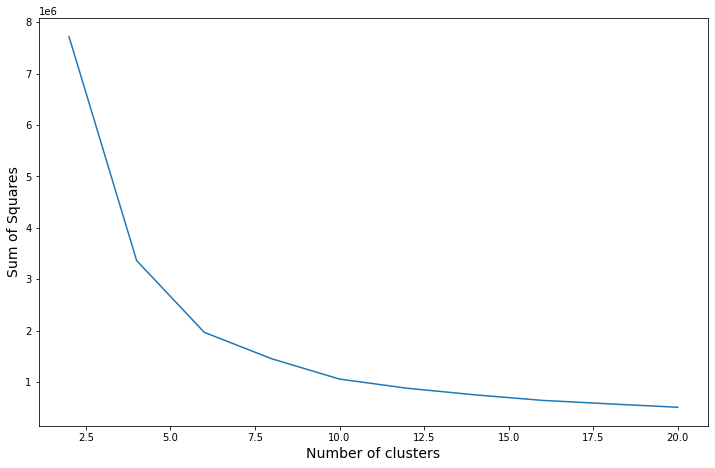

7656007.537183693
3449525.749220483
1931507.0373654012
1328290.072658258
932032.9591434092
739284.893143299
653905.8638522435
578924.7516360465
523053.8044373226
464531.07956087217


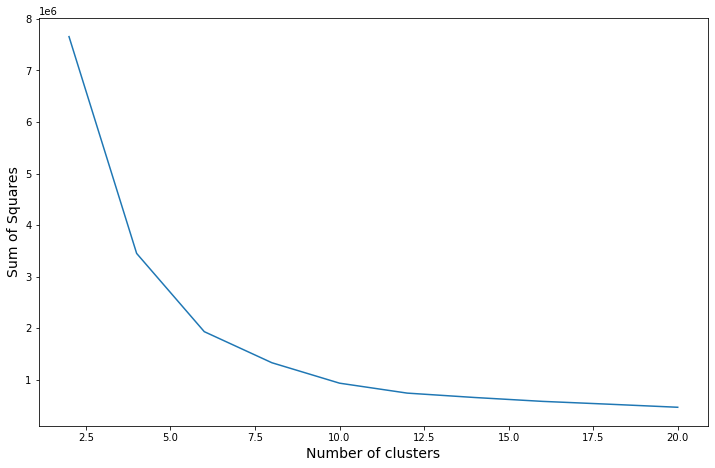

4723760.148751526
2132534.775357237
936338.888780004
591795.5765520367
425534.3665741687
347518.2506152352
294592.465565397
255149.1071409608
225978.09516903647
199669.15981442062


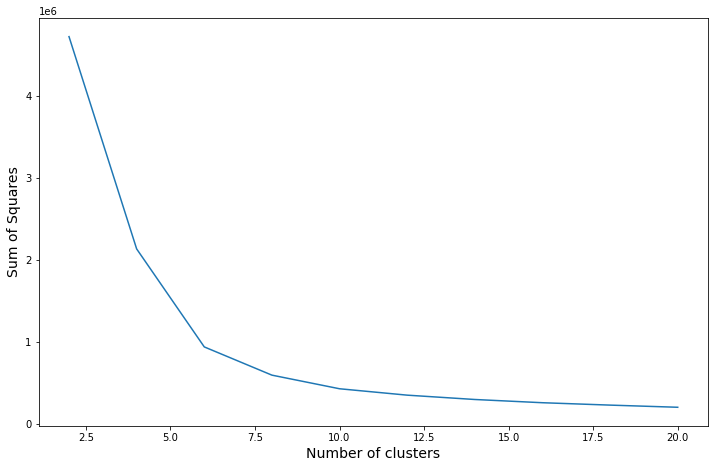

In [12]:
kmeans_elbow(np.squeeze(normed_angular_momentum_x), num_cluster=20)
kmeans_elbow(np.squeeze(normed_angular_momentum_y), num_cluster=20)
kmeans_elbow(np.squeeze(normed_angular_momentum_z), num_cluster=20)


In [14]:
optics = OPTICS()
optics.fit(normed_angular_momentum_x)
print(len(np.unique(optics.labels_)))
optics.fit(normed_angular_momentum_y)
print(len(np.unique(optics.labels_)))
optics.fit(normed_angular_momentum_z)
print(len(np.unique(optics.labels_)))


144
141
167


(1984, 8018)
12554599134932.234
4979880709412.139
2933398193324.911
2163369690851.356
1602921551665.4966
1283780710609.9
1102812186789.831
968646429219.2428
858883026972.5364
754931644544.1271


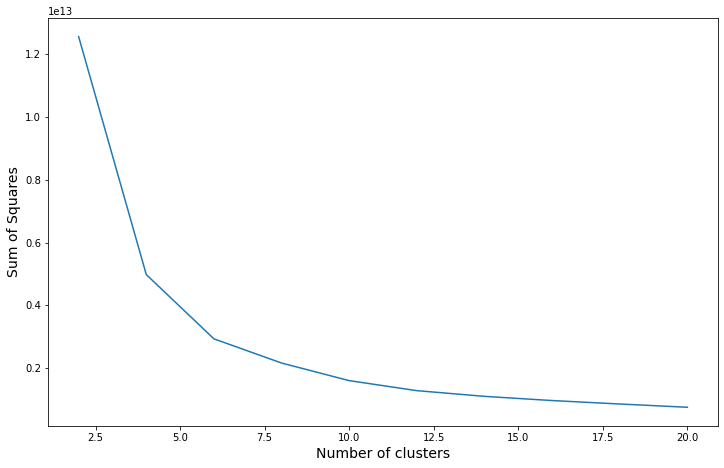

In [7]:
radius = np.linalg.norm(starlink_data[:, :, 1:4], axis=2)
print(radius.shape)

kmeans_elbow(radius, num_cluster=20)

(182, 539)


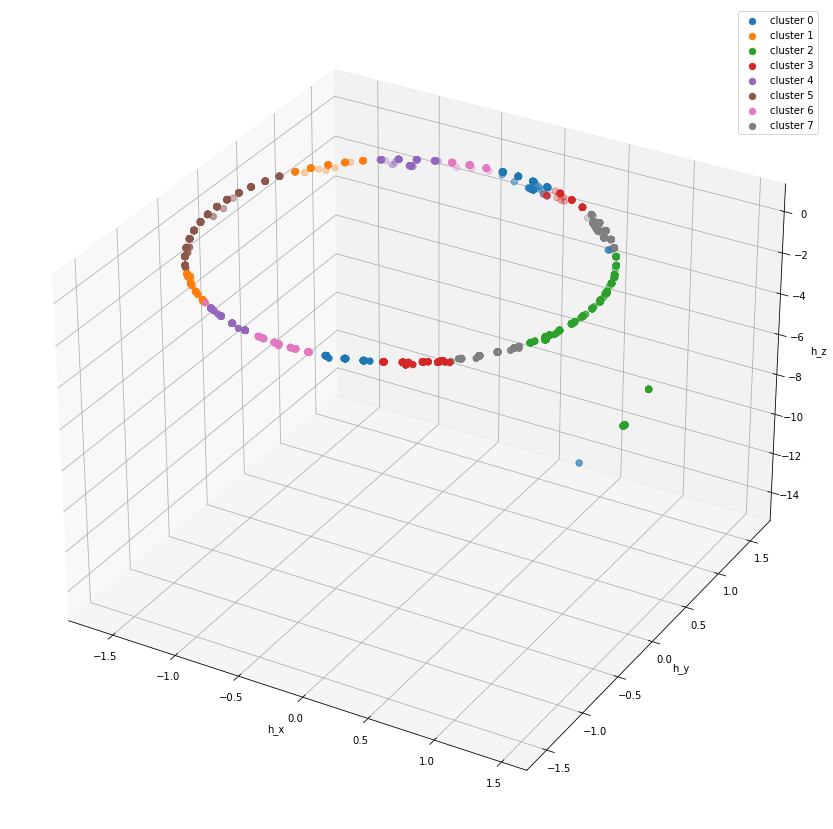

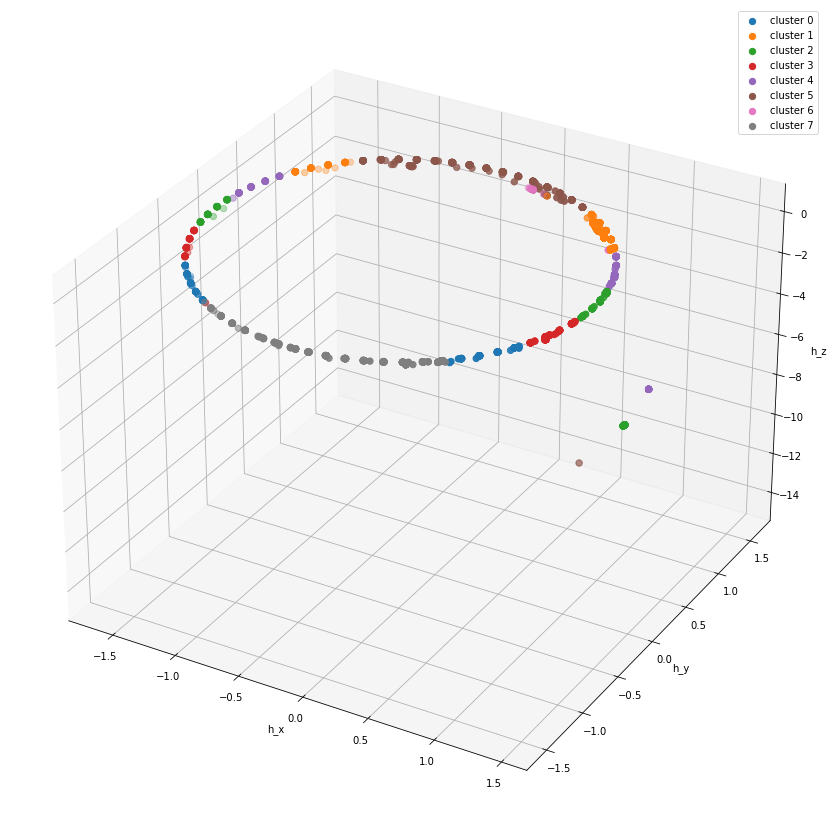

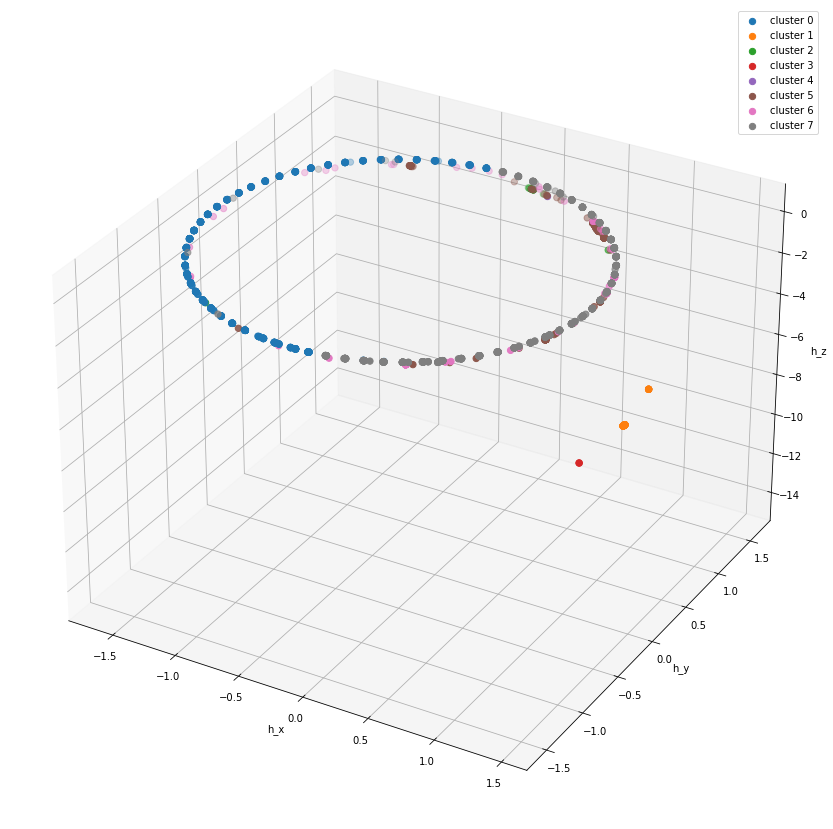

In [19]:
kmeans = KMeans(n_clusters=8, random_state=0)
x_clusters = kmeans.fit_predict(angular_momentum_x)
y_clusters = kmeans.fit_predict(angular_momentum_y)
z_clusters = kmeans.fit_predict(angular_momentum_z)

print(normed_angular_momentum_x[x_clusters == 0].shape)
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(normed_angular_momentum_x[x_clusters == 0,0],normed_angular_momentum_y[x_clusters == 0,1],normed_angular_momentum_z[x_clusters == 0,2], s = 40 , label = "cluster 0")
ax.scatter(normed_angular_momentum_x[x_clusters == 1,0],normed_angular_momentum_y[x_clusters == 1,1],normed_angular_momentum_z[x_clusters == 1,2], s = 40 , label = "cluster 1")
ax.scatter(normed_angular_momentum_x[x_clusters == 2,0],normed_angular_momentum_y[x_clusters == 2,1],normed_angular_momentum_z[x_clusters == 2,2], s = 40 , label = "cluster 2")
ax.scatter(normed_angular_momentum_x[x_clusters == 3,0],normed_angular_momentum_y[x_clusters == 3,1],normed_angular_momentum_z[x_clusters == 3,2], s = 40 , label = "cluster 3")
ax.scatter(normed_angular_momentum_x[x_clusters == 4,0],normed_angular_momentum_y[x_clusters == 4,1],normed_angular_momentum_z[x_clusters == 4,2], s = 40 , label = "cluster 4")
ax.scatter(normed_angular_momentum_x[x_clusters == 5,0],normed_angular_momentum_y[x_clusters == 5,1],normed_angular_momentum_z[x_clusters == 5,2], s = 40 , label = "cluster 5")
ax.scatter(normed_angular_momentum_x[x_clusters == 6,0],normed_angular_momentum_y[x_clusters == 6,1],normed_angular_momentum_z[x_clusters == 6,2], s = 40 , label = "cluster 6")
ax.scatter(normed_angular_momentum_x[x_clusters == 7,0],normed_angular_momentum_y[x_clusters == 7,1],normed_angular_momentum_z[x_clusters == 7,2], s = 40 , label = "cluster 7")


ax.set_xlabel('h_x')
ax.set_ylabel('h_y')
ax.set_zlabel('h_z')
ax.legend()
plt.show()

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(normed_angular_momentum_x[y_clusters == 0,0],normed_angular_momentum_y[y_clusters == 0,1],normed_angular_momentum_z[y_clusters == 0,2], s = 40 , label = "cluster 0")
ax.scatter(normed_angular_momentum_x[y_clusters == 1,0],normed_angular_momentum_y[y_clusters == 1,1],normed_angular_momentum_z[y_clusters == 1,2], s = 40 , label = "cluster 1")
ax.scatter(normed_angular_momentum_x[y_clusters == 2,0],normed_angular_momentum_y[y_clusters == 2,1],normed_angular_momentum_z[y_clusters == 2,2], s = 40 , label = "cluster 2")
ax.scatter(normed_angular_momentum_x[y_clusters == 3,0],normed_angular_momentum_y[y_clusters == 3,1],normed_angular_momentum_z[y_clusters == 3,2], s = 40 , label = "cluster 3")
ax.scatter(normed_angular_momentum_x[y_clusters == 4,0],normed_angular_momentum_y[y_clusters == 4,1],normed_angular_momentum_z[y_clusters == 4,2], s = 40 , label = "cluster 4")
ax.scatter(normed_angular_momentum_x[y_clusters == 5,0],normed_angular_momentum_y[y_clusters == 5,1],normed_angular_momentum_z[y_clusters == 5,2], s = 40 , label = "cluster 5")
ax.scatter(normed_angular_momentum_x[y_clusters == 6,0],normed_angular_momentum_y[y_clusters == 6,1],normed_angular_momentum_z[y_clusters == 6,2], s = 40 , label = "cluster 6")
ax.scatter(normed_angular_momentum_x[y_clusters == 7,0],normed_angular_momentum_y[y_clusters == 7,1],normed_angular_momentum_z[y_clusters == 7,2], s = 40 , label = "cluster 7")


ax.set_xlabel('h_x')
ax.set_ylabel('h_y')
ax.set_zlabel('h_z')
ax.legend()
plt.show()

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(normed_angular_momentum_x[z_clusters == 0,0],normed_angular_momentum_y[z_clusters == 0,1],normed_angular_momentum_z[z_clusters == 0,2], s = 40 , label = "cluster 0")
ax.scatter(normed_angular_momentum_x[z_clusters == 1,0],normed_angular_momentum_y[z_clusters == 1,1],normed_angular_momentum_z[z_clusters == 1,2], s = 40 , label = "cluster 1")
ax.scatter(normed_angular_momentum_x[z_clusters == 2,0],normed_angular_momentum_y[z_clusters == 2,1],normed_angular_momentum_z[z_clusters == 2,2], s = 40 , label = "cluster 2")
ax.scatter(normed_angular_momentum_x[z_clusters == 3,0],normed_angular_momentum_y[z_clusters == 3,1],normed_angular_momentum_z[z_clusters == 3,2], s = 40 , label = "cluster 3")
ax.scatter(normed_angular_momentum_x[z_clusters == 4,0],normed_angular_momentum_y[z_clusters == 4,1],normed_angular_momentum_z[z_clusters == 4,2], s = 40 , label = "cluster 4")
ax.scatter(normed_angular_momentum_x[z_clusters == 5,0],normed_angular_momentum_y[z_clusters == 5,1],normed_angular_momentum_z[z_clusters == 5,2], s = 40 , label = "cluster 5")
ax.scatter(normed_angular_momentum_x[z_clusters == 6,0],normed_angular_momentum_y[z_clusters == 6,1],normed_angular_momentum_z[z_clusters == 6,2], s = 40 , label = "cluster 6")
ax.scatter(normed_angular_momentum_x[z_clusters == 7,0],normed_angular_momentum_y[z_clusters == 7,1],normed_angular_momentum_z[z_clusters == 7,2], s = 40 , label = "cluster 7")


ax.set_xlabel('h_x')
ax.set_ylabel('h_y')
ax.set_zlabel('h_z')
ax.legend()
plt.show()


In [21]:
print(x_clusters.shape)


(1984,)
(50,)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'int'>
Total Satellites: 
1984
h_x Clustering:
182
194
401
211
226
265
150
h_y Clustering:
196
355
226
219
200
383
26
h_z Clustering:
766
51
27
3
1
275
118


<Figure size 1080x1080 with 0 Axes>

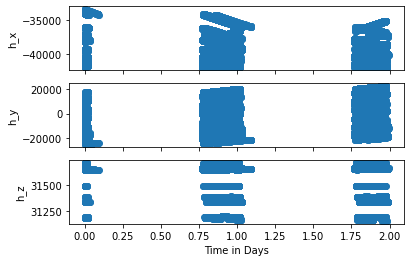

<Figure size 1080x1080 with 0 Axes>

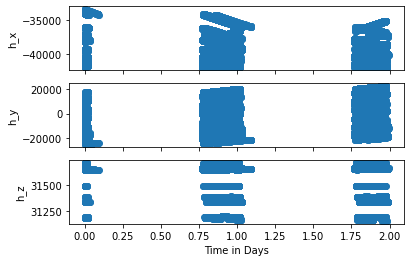

In [11]:
num_cluster = 5
plot_time_clusters(x_clusters, num_cluster, 
            angular_momentum_x,
            angular_momentum_y,
            angular_momentum_z, time)

print(type(x_clusters))
print(type(angular_momentum_x))
print(type(3))

print('Total Satellites: ')
print(time.shape[0])
print("h_x Clustering:")
for i in range(0,7):
    print(normed_angular_momentum_x[x_clusters == i].shape[0])
print("h_y Clustering:")
for i in range(0,7):
    print(normed_angular_momentum_x[y_clusters == i].shape[0])
print("h_z Clustering:")
for i in range(0,7):
    print(normed_angular_momentum_x[z_clusters == i].shape[0])

plot_time_clusters(x_clusters, num_cluster, 
            angular_momentum_x,
            angular_momentum_y,
            angular_momentum_z, time)